In [592]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 10)

In [433]:
path = r'C:\Users\xiand\Desktop\PropTech Challenge 2020\PropTech Challenge 2020 Data'
electric = pd.read_excel(path + '\ConEd_Electric.xlsx')
electric['date_time'] = pd.to_datetime(electric['date_time'])
electric

,date_time,consumption,max_demand,min_demand,avg_demand,temp,humidity
0,2018-01-01 00:15:00,430,1720,1720,1720,NaN,NaN
1,2018-01-01 00:30:00,420,1700,1700,1700,NaN,NaN
2,2018-01-01 00:45:00,440,1720,1720,1720,NaN,NaN
3,2018-01-01 01:00:00,420,1720,1720,1720,9.0,56.1
4,2018-01-01 01:15:00,420,1680,1680,1680,NaN,NaN
...,...,...,...,...,...,...,...
81128,2020-08-31 23:00:00,200,800,800,800,71.6,57.0
81129,2020-08-31 23:15:00,200,800,800,800,NaN,NaN
81130,2020-08-31 23:30:00,200,800,800,800,NaN,NaN
81131,2020-08-31 23:45:00,200,800,800,800,NaN,NaN


In [447]:
date_time = pd.DataFrame(pd.date_range('2018-01-01 00:15:00', '2020-09-01', freq='15T'), columns=['date_time'])
electric = pd.merge(date_time, electric, on='date_time', how='left')
electric

,date_time,consumption,max_demand,min_demand,avg_demand,temp,humidity
0,2018-01-01 00:15:00,430.0,1720.0,1720.0,1720.0,NaN,NaN
1,2018-01-01 00:30:00,420.0,1700.0,1700.0,1700.0,NaN,NaN
2,2018-01-01 00:45:00,440.0,1720.0,1720.0,1720.0,NaN,NaN
3,2018-01-01 01:00:00,420.0,1720.0,1720.0,1720.0,9.0,56.1
4,2018-01-01 01:15:00,420.0,1680.0,1680.0,1680.0,NaN,NaN
...,...,...,...,...,...,...,...
93499,2020-08-31 23:00:00,200.0,800.0,800.0,800.0,71.6,57.0
93500,2020-08-31 23:15:00,200.0,800.0,800.0,800.0,NaN,NaN
93501,2020-08-31 23:30:00,200.0,800.0,800.0,800.0,NaN,NaN
93502,2020-08-31 23:45:00,200.0,800.0,800.0,800.0,NaN,NaN


In [508]:
electric[electric['max_demand']==electric['min_demand']].shape

(81133, 7)

In [509]:
electric[electric['max_demand']==electric['avg_demand']].shape

(81133, 7)

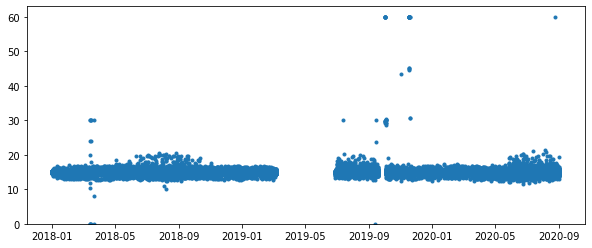

In [614]:
electric['minute'] = electric['consumption']/electric['max_demand']*60
plt.figure(figsize=(10,4))
plt.plot(electric['date_time'], electric['minute'], '.')
plt.ylim(ymin=0)
plt.show()

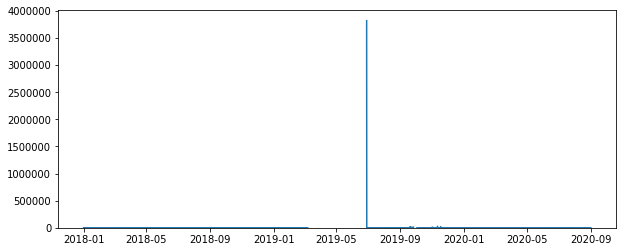

In [495]:
plt.figure(figsize=(10,4))
plt.plot(electric['date_time'], electric['consumption'])
plt.ylim(ymin=0)
plt.show()

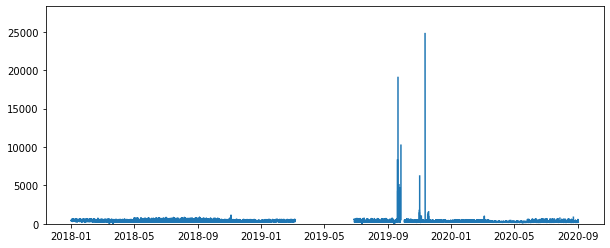

In [498]:
df = electric[electric['consumption']!=electric['consumption'].max()]
plt.figure(figsize=(10,4))
plt.plot(df['date_time'], df['consumption'])
plt.ylim(ymin=0)
plt.show()

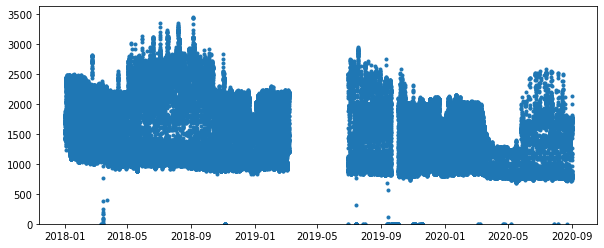

In [503]:
plt.figure(figsize=(10,4))
plt.plot(electric['date_time'], electric['max_demand'], '.')
plt.ylim(ymin=0)
plt.show()

In [511]:
electric[(electric['consumption']==0) & (electric['max_demand']>0)]

,date_time,consumption,max_demand,min_demand,avg_demand,temp,humidity
7053,2018-03-15 11:30:00,0.0,380.0,380.0,380.0,NaN,NaN
7058,2018-03-15 12:45:00,0.0,80.0,80.0,80.0,NaN,NaN
7061,2018-03-15 13:30:00,0.0,160.0,160.0,160.0,NaN,NaN
7064,2018-03-15 14:15:00,0.0,160.0,160.0,160.0,NaN,NaN
7738,2018-03-22 14:45:00,0.0,400.0,400.0,400.0,NaN,NaN
59475,2019-09-12 13:00:00,0.0,680.0,680.0,680.0,76.2,69.0


In [513]:
electric[(electric['consumption']>0) & (electric['max_demand']==0)].shape

(214, 7)

In [514]:
electric[(electric['consumption']>0) & (electric['max_demand']==0)].head()

,date_time,consumption,max_demand,min_demand,avg_demand,temp,humidity
6635,2018-03-11 03:00:00,260.0,0.0,0.0,0.0,34.8,53.6
6636,2018-03-11 03:15:00,280.0,0.0,0.0,0.0,NaN,NaN
29463,2018-11-03 22:00:00,220.0,0.0,0.0,0.0,50.4,54.9
29464,2018-11-03 22:15:00,230.0,0.0,0.0,0.0,NaN,NaN
29465,2018-11-03 22:30:00,230.0,0.0,0.0,0.0,NaN,NaN


In [457]:
electric[electric['consumption'].isnull()]['date_time'].dt.date.unique()[:20]

array([datetime.date(2018, 3, 11), datetime.date(2019, 3, 7),
       datetime.date(2019, 3, 8), datetime.date(2019, 3, 9),
       datetime.date(2019, 3, 10), datetime.date(2019, 3, 11),
       datetime.date(2019, 3, 12), datetime.date(2019, 3, 13),
       datetime.date(2019, 3, 14), datetime.date(2019, 3, 15),
       datetime.date(2019, 3, 16), datetime.date(2019, 3, 17),
       datetime.date(2019, 3, 18), datetime.date(2019, 3, 19),
       datetime.date(2019, 3, 20), datetime.date(2019, 3, 21),
       datetime.date(2019, 3, 22), datetime.date(2019, 3, 23),
       datetime.date(2019, 3, 24), datetime.date(2019, 3, 25)],
      dtype=object)

In [460]:
electric[electric['consumption'].isnull()]['date_time'].dt.date.unique()[-40:]

array([datetime.date(2019, 6, 21), datetime.date(2019, 6, 22),
       datetime.date(2019, 6, 23), datetime.date(2019, 6, 24),
       datetime.date(2019, 6, 25), datetime.date(2019, 6, 26),
       datetime.date(2019, 6, 27), datetime.date(2019, 6, 28),
       datetime.date(2019, 7, 28), datetime.date(2019, 9, 19),
       datetime.date(2019, 9, 20), datetime.date(2019, 9, 21),
       datetime.date(2019, 9, 22), datetime.date(2019, 9, 23),
       datetime.date(2019, 9, 24), datetime.date(2019, 9, 25),
       datetime.date(2019, 9, 26), datetime.date(2019, 9, 27),
       datetime.date(2019, 9, 28), datetime.date(2019, 9, 29),
       datetime.date(2019, 9, 30), datetime.date(2019, 10, 1),
       datetime.date(2019, 10, 2), datetime.date(2019, 10, 3),
       datetime.date(2019, 10, 31), datetime.date(2019, 11, 1),
       datetime.date(2019, 11, 2), datetime.date(2019, 11, 3),
       datetime.date(2019, 11, 4), datetime.date(2019, 11, 10),
       datetime.date(2019, 11, 11), datetime.date(201

In [174]:
electric[electric['consumption']>100000]

,date_time,consumption,max_demand,min_demand,avg_demand,temp,humidity
52180,2019-06-28 13:15:00,3819600.0,0.0,0.0,0.0,NaN,NaN


In [593]:
electric[electric['date_time'].dt.strftime('%Y-%m-%d')=='2019-03-07'].head(50)

,date_time,consumption,max_demand,min_demand,avg_demand,temp,humidity,hours
41279,2019-03-07 00:00:00,340.0,1360.0,1360.0,1360.0,21.5,0.0,0.250000
41280,2019-03-07 00:15:00,330.0,1340.0,1340.0,1340.0,NaN,NaN,0.246269
41281,2019-03-07 00:30:00,320.0,1300.0,1300.0,1300.0,NaN,NaN,0.246154
41282,2019-03-07 00:45:00,310.0,1260.0,1260.0,1260.0,NaN,NaN,0.246032
41283,2019-03-07 01:00:00,320.0,1260.0,1260.0,1260.0,21.5,0.0,0.253968
...,...,...,...,...,...,...,...,...
41324,2019-03-07 11:15:00,540.0,2140.0,2140.0,2140.0,NaN,NaN,0.252336
41325,2019-03-07 11:30:00,540.0,2160.0,2160.0,2160.0,NaN,NaN,0.250000
41326,2019-03-07 11:45:00,540.0,2160.0,2160.0,2160.0,NaN,NaN,0.250000
41327,2019-03-07 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [467]:
electric[electric['date_time']<'2019-03-07 12:00:00']['consumption'].fillna(0).mean()

388.92177027125126

In [472]:
electric[electric['date_time']>'2019-06-28 13:00:00']['consumption'].fillna(0).mean()

400.9853837963411

In [468]:
electric[(electric['date_time']>='2019-03-07 12:00:00') & (electric['date_time']<='2019-06-28 13:00:00')].shape

(10853, 7)

In [569]:
electric['consumption'].max()/(10853+1)

351.9071310116086

(0, 1186.5)

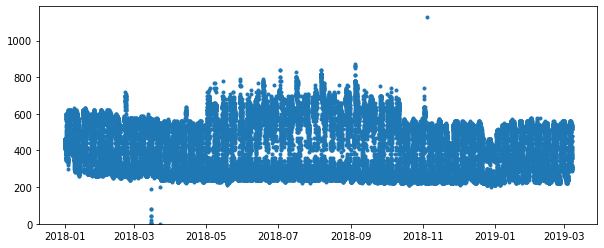

In [476]:
df = electric[electric['date_time']<'2019-03-07 12:00:00']
plt.figure(figsize=(10,4))
plt.plot(df['date_time'], df['consumption'], '.')
plt.ylim(ymin=0)

(0, 346.5)

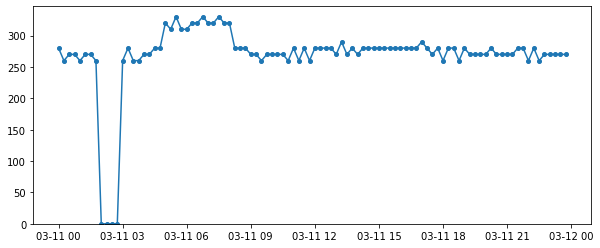

In [483]:
df = electric[electric['date_time'].dt.strftime('%Y-%m-%d')=='2018-03-11']
plt.figure(figsize=(10,4))
plt.plot(df['date_time'], df['consumption'].fillna(0), '-o', markersize=4)
plt.ylim(ymin=0)

In [486]:
electric[(electric['date_time']>='2018-03-11 01:00:00') & (electric['date_time']<='2018-03-11 03:00:00')]

,date_time,consumption,max_demand,min_demand,avg_demand,temp,humidity
6627,2018-03-11 01:00:00,260.0,1060.0,1060.0,1060.0,34.8,53.4
6628,2018-03-11 01:15:00,270.0,1060.0,1060.0,1060.0,NaN,NaN
6629,2018-03-11 01:30:00,270.0,1080.0,1080.0,1080.0,NaN,NaN
6630,2018-03-11 01:45:00,260.0,1060.0,1060.0,1060.0,NaN,NaN
6631,2018-03-11 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN
6632,2018-03-11 02:15:00,NaN,NaN,NaN,NaN,NaN,NaN
6633,2018-03-11 02:30:00,NaN,NaN,NaN,NaN,NaN,NaN
6634,2018-03-11 02:45:00,NaN,NaN,NaN,NaN,NaN,NaN
6635,2018-03-11 03:00:00,260.0,0.0,0.0,0.0,34.8,53.6


(0, 28308.0)

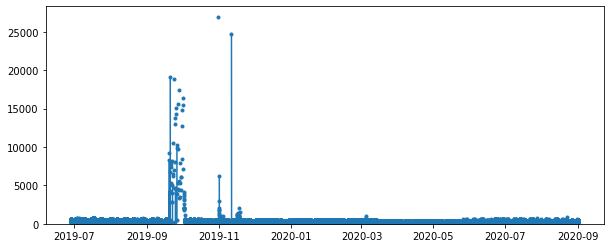

In [542]:
df = electric[electric['date_time']>='2019-06-28 13:30:00']
plt.figure(figsize=(10,4))
plt.plot(df['date_time'], df['consumption'], '-o', markersize=3)
plt.ylim(ymin=0)

(0, 20002.5)

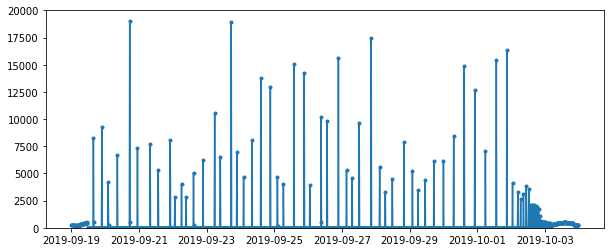

In [547]:
df = electric[(electric['date_time']>='2019-09-19') & (electric['date_time']<'2019-10-04')]
plt.figure(figsize=(10,4))
plt.plot(df['date_time'], df['consumption'].fillna(0), '-o', markersize=3)
plt.ylim(ymin=0)

In [556]:
df = electric[(electric['date_time']>='2019-09-19 11:00:00') & (electric['date_time']<='2019-09-19 16:00:00')]
df

,date_time,consumption,max_demand,min_demand,avg_demand,temp,humidity,hours
60139,2019-09-19 11:00:00,460.0,1820.0,1820.0,1820.0,62.0,45.6,0.252747
60140,2019-09-19 11:15:00,470.0,1860.0,1860.0,1860.0,NaN,NaN,0.252688
60141,2019-09-19 11:30:00,490.0,1920.0,1920.0,1920.0,NaN,NaN,0.255208
60142,2019-09-19 11:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60143,2019-09-19 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60144,2019-09-19 12:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60145,2019-09-19 12:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60146,2019-09-19 12:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60147,2019-09-19 13:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60148,2019-09-19 13:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [566]:
8290/(60158-60141)

487.6470588235294

In [560]:
df = electric[(electric['date_time']>='2019-09-19 16:00:00') & (electric['date_time']<='2019-09-19 21:45:00')]
df.head(30)

,date_time,consumption,max_demand,min_demand,avg_demand,temp,humidity,hours
60159,2019-09-19 16:00:00,490.0,0.0,0.0,0.0,69.3,20.3,inf
60160,2019-09-19 16:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60161,2019-09-19 16:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60162,2019-09-19 16:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60163,2019-09-19 17:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60164,2019-09-19 17:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60165,2019-09-19 17:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60166,2019-09-19 17:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60167,2019-09-19 18:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60168,2019-09-19 18:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [567]:
9230/(60182-60159)

401.30434782608694

(0, 28298.0)

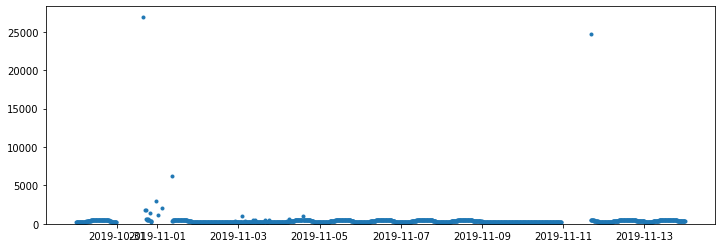

In [579]:
df = electric[(electric['date_time']>='2019-10-30') & (electric['date_time']<='2019-11-14')]
plt.figure(figsize=(12,4))
plt.plot(df['date_time'], df['consumption'], '.')
plt.ylim(ymin=0)

In [578]:
electric['temp'].min(), electric['temp'].max()

(0.0, 96.9)

(0, 101.745)

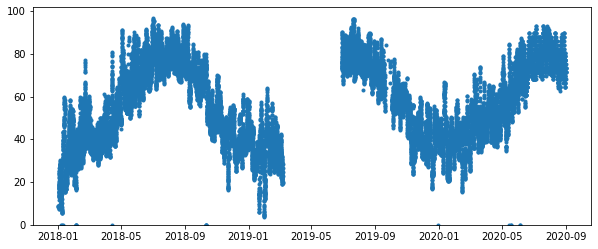

In [283]:
plt.figure(figsize=(10,4))
plt.plot(electric['date_time'], electric['temp'], '.')
plt.ylim(ymin=0)

In [580]:
electric['humidity'].min(), electric['humidity'].max()

(0.0, 100.0)

(0, 105.0)

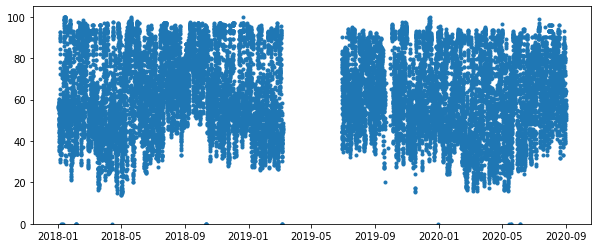

In [297]:
plt.figure(figsize=(10,4))
plt.plot(electric['date_time'], electric['humidity'], '.')
plt.ylim(ymin=0)

In [594]:
steam = pd.read_excel(path + '\ConEd_Steam.xlsx')
steam['date_time'] = pd.to_datetime(steam['date_time'])
steam

,date_time,consumption,max_demand,min_demand,avg_demand,temp,humidity
0,2018-01-01 00:15:00,4800,18700,18700,18700,NaN,NaN
1,2018-01-01 00:30:00,4480,18560,18560,18560,NaN,NaN
2,2018-01-01 00:45:00,5350,19660,19660,19660,NaN,NaN
3,2018-01-01 01:00:00,5660,22020,22020,22020,9.0,56.1
4,2018-01-01 01:15:00,5660,22640,22640,22640,NaN,NaN
...,...,...,...,...,...,...,...
91735,2020-08-31 23:00:00,0,0,0,0,71.6,57.0
91736,2020-08-31 23:15:00,0,0,0,0,NaN,NaN
91737,2020-08-31 23:30:00,0,0,0,0,NaN,NaN
91738,2020-08-31 23:45:00,0,0,0,0,NaN,NaN


In [595]:
steam['date_time'].min(), steam['date_time'].max()

(Timestamp('2018-01-01 00:15:00'), Timestamp('2020-09-01 00:00:00'))

In [596]:
steam = pd.merge(date_time, steam, on='date_time', how='left')
steam

,date_time,consumption,max_demand,min_demand,avg_demand,temp,humidity
0,2018-01-01 00:15:00,4800.0,18700.0,18700.0,18700.0,NaN,NaN
1,2018-01-01 00:30:00,4480.0,18560.0,18560.0,18560.0,NaN,NaN
2,2018-01-01 00:45:00,5350.0,19660.0,19660.0,19660.0,NaN,NaN
3,2018-01-01 01:00:00,5660.0,22020.0,22020.0,22020.0,9.0,56.1
4,2018-01-01 01:15:00,5660.0,22640.0,22640.0,22640.0,NaN,NaN
...,...,...,...,...,...,...,...
93499,2020-08-31 23:00:00,0.0,0.0,0.0,0.0,71.6,57.0
93500,2020-08-31 23:15:00,0.0,0.0,0.0,0.0,NaN,NaN
93501,2020-08-31 23:30:00,0.0,0.0,0.0,0.0,NaN,NaN
93502,2020-08-31 23:45:00,0.0,0.0,0.0,0.0,NaN,NaN


(0, 394044.0)

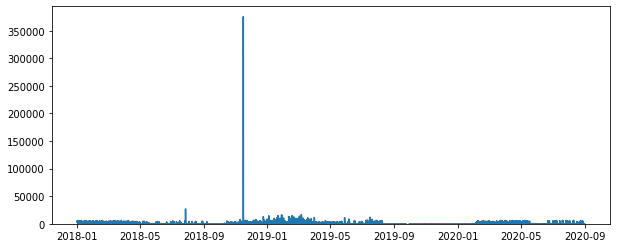

In [598]:
plt.figure(figsize=(10,4))
plt.plot(steam['date_time'], steam['consumption'])
plt.ylim(ymin=0)

(0, 28287.0)

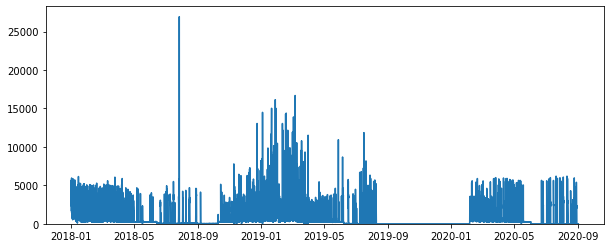

In [656]:
df = steam[steam['consumption']<steam['consumption'].max()]
plt.figure(figsize=(10,4))
plt.plot(df['date_time'], df['consumption'])
plt.ylim(ymin=0)

(0, 69636.0)

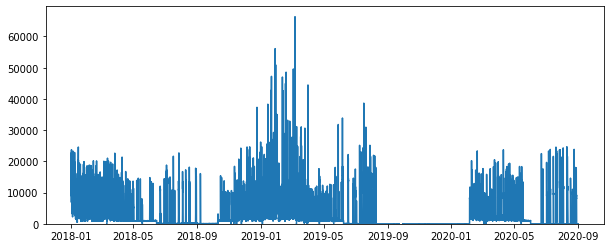

In [601]:
plt.figure(figsize=(10,4))
plt.plot(steam['date_time'], steam['max_demand'])
plt.ylim(ymin=0)

In [602]:
steam[steam['max_demand']==steam['min_demand']].shape

(91740, 7)

In [603]:
steam[steam['max_demand']==steam['avg_demand']].shape

(91740, 7)

In [608]:
steam[(steam['consumption']==0) & (steam['max_demand']>0)]

,date_time,consumption,max_demand,min_demand,avg_demand,temp,humidity,hours
13154,2018-05-18 00:45:00,0.0,320.0,320.0,320.0,NaN,NaN,0.0
15787,2018-06-14 11:00:00,0.0,180.0,180.0,180.0,78.3,34.6,0.0
15795,2018-06-14 13:00:00,0.0,20.0,20.0,20.0,83.2,28.1,0.0
15797,2018-06-14 13:30:00,0.0,100.0,100.0,100.0,NaN,NaN,0.0
15808,2018-06-14 16:15:00,0.0,100.0,100.0,100.0,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...
92524,2020-08-21 19:15:00,0.0,1960.0,1960.0,1960.0,NaN,NaN,0.0
92812,2020-08-24 19:15:00,0.0,3320.0,3320.0,3320.0,NaN,NaN,0.0
92908,2020-08-25 19:15:00,0.0,2820.0,2820.0,2820.0,NaN,NaN,0.0
93100,2020-08-27 19:15:00,0.0,2700.0,2700.0,2700.0,NaN,NaN,0.0


In [609]:
steam[(steam['max_demand']==0) & (steam['consumption']>0)]

,date_time,consumption,max_demand,min_demand,avg_demand,temp,humidity,hours
6635,2018-03-11 03:00:00,460.0,0.0,0.0,0.0,34.8,53.6,inf
6636,2018-03-11 03:15:00,420.0,0.0,0.0,0.0,NaN,NaN,inf
19947,2018-07-27 19:00:00,26940.0,0.0,0.0,0.0,74.0,83.7,inf
19948,2018-07-27 19:15:00,2530.0,0.0,0.0,0.0,NaN,NaN,inf
29463,2018-11-03 22:00:00,250.0,0.0,0.0,0.0,50.4,54.9,inf
...,...,...,...,...,...,...,...,...
76173,2020-03-04 11:30:00,1260.0,0.0,0.0,0.0,NaN,NaN,inf
76523,2020-03-08 03:00:00,490.0,0.0,0.0,0.0,36.0,36.7,inf
76524,2020-03-08 03:15:00,490.0,0.0,0.0,0.0,NaN,NaN,inf
83005,2020-05-14 15:30:00,520.0,0.0,0.0,0.0,NaN,NaN,inf


(0, 63.0)

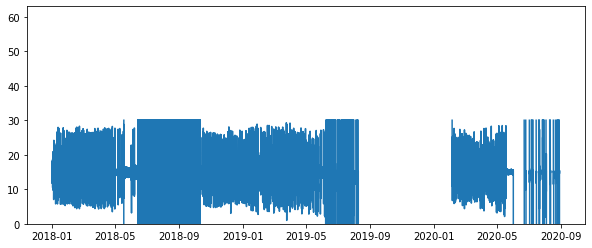

In [611]:
steam['minute'] = steam['consumption']/steam['max_demand']*60
plt.figure(figsize=(10,4))
plt.plot(steam['date_time'], steam['minute'])
plt.ylim(ymin=0)

In [600]:
steam[steam['consumption'].isnull()]['date_time'].dt.date.unique()

array([datetime.date(2018, 3, 11), datetime.date(2019, 3, 10),
       datetime.date(2019, 4, 22), datetime.date(2019, 5, 20),
       datetime.date(2019, 7, 13), datetime.date(2019, 9, 12),
       datetime.date(2019, 9, 13), datetime.date(2019, 9, 14),
       datetime.date(2019, 9, 19), datetime.date(2019, 9, 20),
       datetime.date(2019, 9, 21), datetime.date(2019, 9, 22),
       datetime.date(2019, 9, 23), datetime.date(2019, 9, 24),
       datetime.date(2019, 9, 25), datetime.date(2019, 9, 26),
       datetime.date(2019, 9, 27), datetime.date(2019, 9, 28),
       datetime.date(2019, 9, 29), datetime.date(2019, 9, 30),
       datetime.date(2019, 10, 1), datetime.date(2019, 10, 2),
       datetime.date(2019, 10, 3), datetime.date(2019, 10, 30),
       datetime.date(2019, 10, 31), datetime.date(2019, 11, 1),
       datetime.date(2019, 11, 10), datetime.date(2019, 11, 11),
       datetime.date(2019, 11, 16), datetime.date(2019, 11, 17),
       datetime.date(2019, 11, 18), datetime.date

In [615]:
steam[steam['consumption']>350000]

,date_time,consumption,max_demand,min_demand,avg_demand,temp,humidity,hours,min,minute
30594,2018-11-15 16:45:00,375280.0,0.0,0.0,0.0,NaN,NaN,inf,inf,inf


(0, 394044.0)

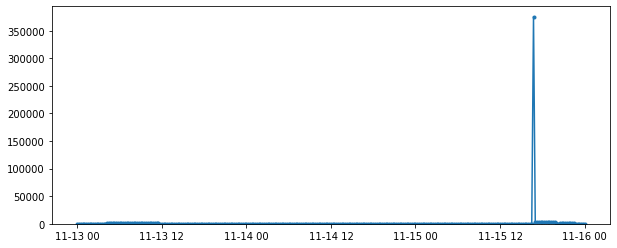

In [640]:
df = steam[(steam['date_time']>='2018-11-13') & (steam['date_time']<='2018-11-16')]
plt.figure(figsize=(10,4))
plt.plot(df['date_time'], df['consumption'].fillna(0), '-o', markersize=3)
plt.ylim(ymin=0)

In [641]:
steam[(steam['date_time']>='2018-11-13 11:00:00') & (steam['date_time']<='2018-11-15 17:30:00')]

,date_time,consumption,max_demand,min_demand,avg_demand,temp,humidity,hours,min,minute
30379,2018-11-13 11:00:00,1970.0,7480.0,7480.0,7480.0,46.3,94.1,0.263369,15.802139,15.802139
30380,2018-11-13 11:15:00,2020.0,7980.0,7980.0,7980.0,NaN,NaN,0.253133,15.187970,15.187970
30381,2018-11-13 11:30:00,2040.0,8120.0,8120.0,8120.0,NaN,NaN,0.251232,15.073892,15.073892
30382,2018-11-13 11:45:00,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
30383,2018-11-13 12:00:00,0.0,0.0,0.0,0.0,45.9,91.5,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
30593,2018-11-15 16:30:00,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
30594,2018-11-15 16:45:00,375280.0,0.0,0.0,0.0,NaN,NaN,inf,inf,inf
30595,2018-11-15 17:00:00,2950.0,0.0,0.0,0.0,30.1,95.0,inf,inf,inf
30596,2018-11-15 17:15:00,2940.0,11780.0,11780.0,11780.0,NaN,NaN,0.249576,14.974533,14.974533


In [642]:
375280/(30594-30381)

1761.8779342723005

In [644]:
steam[(steam['consumption']>=20000) & (steam['consumption']<=350000)]

,date_time,consumption,max_demand,min_demand,avg_demand,temp,humidity,hours,min,minute
19947,2018-07-27 19:00:00,26940.0,0.0,0.0,0.0,74.0,83.7,inf,inf,inf


(0, 28287.0)

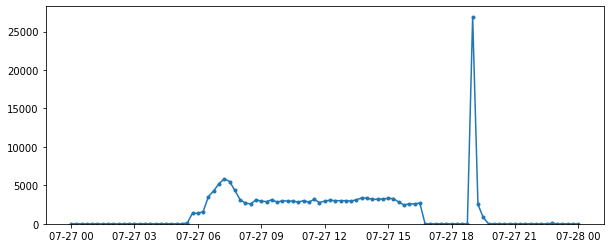

In [645]:
df = steam[(steam['date_time']>='2018-07-27') & (steam['date_time']<='2018-07-28')]
plt.figure(figsize=(10,4))
plt.plot(df['date_time'], df['consumption'].fillna(0), '-o', markersize=3)
plt.ylim(ymin=0)

In [654]:
steam[(steam['date_time']>='2018-07-27 16:00:00') & (steam['date_time']<='2018-07-27 20:00:00')]

,date_time,consumption,max_demand,min_demand,avg_demand,temp,humidity,hours,min,minute
19935,2018-07-27 16:00:00,2580.0,10080.0,10080.0,10080.0,80.5,73.2,0.255952,15.357143,15.357143
19936,2018-07-27 16:15:00,2590.0,10340.0,10340.0,10340.0,NaN,NaN,0.250484,15.029014,15.029014
19937,2018-07-27 16:30:00,2700.0,10580.0,10580.0,10580.0,NaN,NaN,0.255198,15.311909,15.311909
19938,2018-07-27 16:45:00,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
19939,2018-07-27 17:00:00,0.0,0.0,0.0,0.0,75.8,90.4,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
19947,2018-07-27 19:00:00,26940.0,0.0,0.0,0.0,74.0,83.7,inf,inf,inf
19948,2018-07-27 19:15:00,2530.0,0.0,0.0,0.0,NaN,NaN,inf,inf,inf
19949,2018-07-27 19:30:00,830.0,6720.0,6720.0,6720.0,NaN,NaN,0.123512,7.410714,7.410714
19950,2018-07-27 19:45:00,0.0,1660.0,1660.0,1660.0,NaN,NaN,0.000000,0.000000,0.000000


In [655]:
26940/(19947-19937)

2694.0

(0, 5481.0)

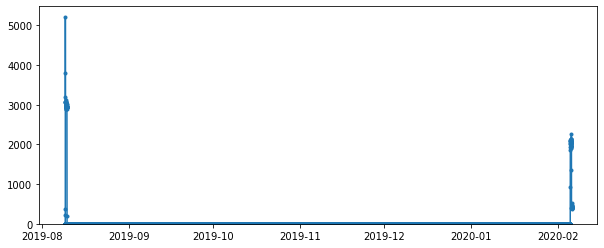

In [658]:
df = steam[(steam['date_time']>='2019-08-09') & (steam['date_time']<='2020-02-06')]
plt.figure(figsize=(10,4))
plt.plot(df['date_time'], df['consumption'].fillna(0), '-o', markersize=3)
plt.ylim(ymin=0)

(0, 5481.0)

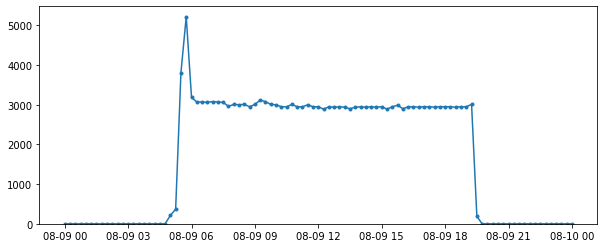

In [666]:
df = steam[(steam['date_time']>='2019-08-09') & (steam['date_time']<='2019-08-10')]
plt.figure(figsize=(10,4))
plt.plot(df['date_time'], df['consumption'].fillna(0), '-o', markersize=3)
plt.ylim(ymin=0)

(0, 2383.5)

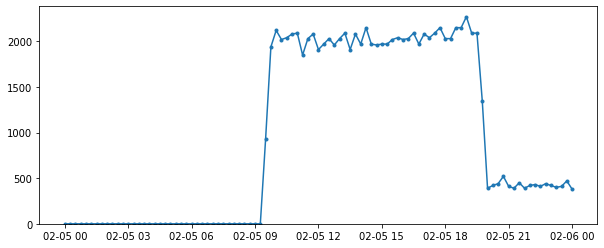

In [672]:
df = steam[(steam['date_time']>='2020-02-05') & (steam['date_time']<='2020-02-06')]
plt.figure(figsize=(10,4))
plt.plot(df['date_time'], df['consumption'].fillna(0), '-o', markersize=3)
plt.ylim(ymin=0)

In [679]:
steam[(steam['date_time']>='2019-08-09 19:00:00') & (steam['date_time']<='2020-02-05 10:00:00')]

,date_time,consumption,max_demand,min_demand,avg_demand,temp,humidity,hours,min,minute
56235,2019-08-09 19:00:00,2950.0,11800.0,11800.0,11800.0,77.6,54.8,0.250000,15.000000,15.000000
56236,2019-08-09 19:15:00,3010.0,11920.0,11920.0,11920.0,NaN,NaN,0.252517,15.151007,15.151007
56237,2019-08-09 19:30:00,190.0,6400.0,6400.0,6400.0,NaN,NaN,0.029687,1.781250,1.781250
56238,2019-08-09 19:45:00,0.0,380.0,380.0,380.0,NaN,NaN,0.000000,0.000000,0.000000
56239,2019-08-09 20:00:00,0.0,0.0,0.0,0.0,78.3,45.3,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
73475,2020-02-05 09:00:00,0.0,0.0,0.0,0.0,40.9,61.2,NaN,NaN,NaN
73476,2020-02-05 09:15:00,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
73477,2020-02-05 09:30:00,930.0,1860.0,1860.0,1860.0,NaN,NaN,0.500000,30.000000,30.000000
73478,2020-02-05 09:45:00,1940.0,5740.0,5740.0,5740.0,NaN,NaN,0.337979,20.278746,20.278746


(0, 101.745)

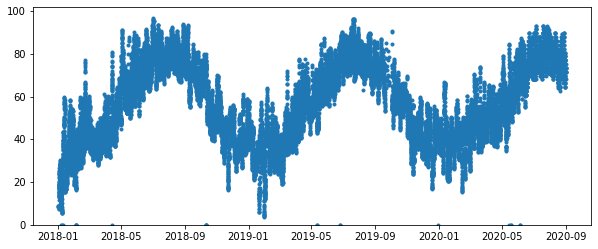

In [680]:
plt.figure(figsize=(10,4))
plt.plot(steam['date_time'], steam['temp'], '.')
plt.ylim(ymin=0)

(0, 105.0)

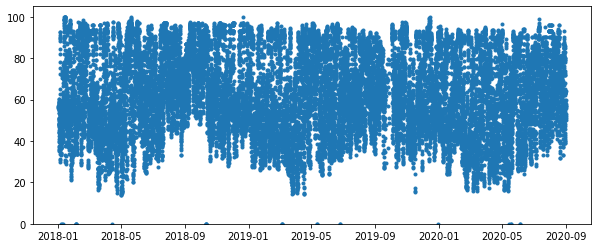

In [683]:
plt.figure(figsize=(10,4))
plt.plot(steam['date_time'], steam['humidity'], '.')
plt.ylim(ymin=0)

In [692]:
weather = steam[['date_time', 'temp', 'humidity']]
weather[weather['temp']==0]

,date_time,temp,humidity
407,2018-01-05 06:00:00,0.0,0.0
587,2018-01-07 03:00:00,0.0,0.0
859,2018-01-09 23:00:00,0.0,0.0
3243,2018-02-03 19:00:00,0.0,0.0
3247,2018-02-03 20:00:00,0.0,0.0
...,...,...,...
83075,2020-05-15 09:00:00,0.0,0.0
83419,2020-05-18 23:00:00,0.0,0.0
83423,2020-05-19 00:00:00,0.0,0.0
84999,2020-06-04 10:00:00,0.0,0.0


In [693]:
weather = weather.replace({0: np.nan})
weather

,date_time,temp,humidity
0,2018-01-01 00:15:00,NaN,NaN
1,2018-01-01 00:30:00,NaN,NaN
2,2018-01-01 00:45:00,NaN,NaN
3,2018-01-01 01:00:00,9.0,56.1
4,2018-01-01 01:15:00,NaN,NaN
...,...,...,...
93499,2020-08-31 23:00:00,71.6,57.0
93500,2020-08-31 23:15:00,NaN,NaN
93501,2020-08-31 23:30:00,NaN,NaN
93502,2020-08-31 23:45:00,NaN,NaN


In [703]:
weather['temp'] = weather['temp'].interpolate(limit_direction='both')
weather['humidity'] = weather['humidity'].interpolate(limit_direction='both')
weather

,date_time,temp,humidity
0,2018-01-01 00:15:00,9.000,56.100
1,2018-01-01 00:30:00,9.000,56.100
2,2018-01-01 00:45:00,9.000,56.100
3,2018-01-01 01:00:00,9.000,56.100
4,2018-01-01 01:15:00,8.975,56.125
...,...,...,...
93499,2020-08-31 23:00:00,71.600,57.000
93500,2020-08-31 23:15:00,71.600,57.000
93501,2020-08-31 23:30:00,71.600,57.000
93502,2020-08-31 23:45:00,71.600,57.000


In [705]:
occupancy = pd.read_excel(path + '\Occupancy.xlsx')
occupancy

,date,entries
0,2020-02-10,1900.0
1,2020-03-09,1743.0
2,2020-03-10,1607.0
3,2020-03-11,1573.0
4,2020-03-12,1259.0
...,...,...
123,2020-08-26,270.0
124,2020-08-27,206.0
125,2020-08-28,169.0
126,2020-08-31,234.0


In [706]:
date = pd.DataFrame(pd.date_range('2020-02-10', '2020-08-31'), columns=['date'])
occupancy = pd.merge(date, occupancy, on='date', how='left')
occupancy

,date,entries
0,2020-02-10,1900.0
1,2020-02-11,NaN
2,2020-02-12,NaN
3,2020-02-13,NaN
4,2020-02-14,NaN
...,...,...
199,2020-08-27,206.0
200,2020-08-28,169.0
201,2020-08-29,NaN
202,2020-08-30,NaN


(0, 1994.7)

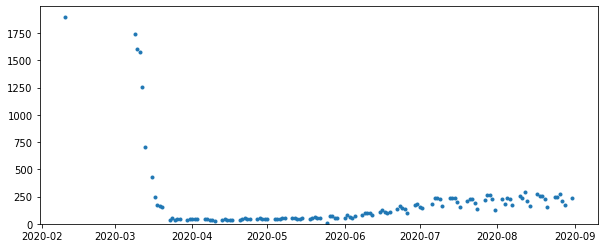

In [707]:
plt.figure(figsize=(10,4))
plt.plot(occupancy['date'], occupancy['entries'], '.')
plt.ylim(ymin=0)

In [708]:
tenant_usage = pd.ExcelFile(path + '\Tenant_Usage.xlsx')
tenant_usage.sheet_names

['Meters',
 'Interval Data 1-001',
 'Interval Data 1-002',
 'Interval Data 1-003',
 'Interval Data 1-004',
 'Interval Data 1-005',
 'Interval Data 1-006',
 'Interval Data 1-007',
 'Interval Data 1-008',
 'Interval Data 1-009',
 'Interval Data 1-010',
 'Interval Data 1-011',
 'Interval Data 1-012',
 'Interval Data 1-013',
 'Interval Data 1-014',
 'Interval Data 1-015',
 'Interval Data 1-016',
 'Interval Data 1-017',
 'Interval Data 1-018']

In [711]:
tenant_usage_meters = tenant_usage.parse('Meters')
tenant_usage_meters.head(10)

,Meter Number,Location,Utility
0,1-001,Floor 3 South HP,Electric
1,1-002,Floor 3 South LP,Electric
2,1-003,Floor 3 South HP,Electric
3,1-004,Floor 5 South HP,Electric
4,1-005,Floor 6 North LP,Electric
5,1-006,Floor 6 North HP,Electric
6,1-007,Floor 1 South HP,Electric
7,1-008,Floor 1 South HP,Electric
8,1-009,Floor 4 South,Electric
9,1-010,Floor 4 North LP,Electric


In [719]:
tenant_usage_meters['Floor'] = tenant_usage_meters['Location'].str.extract('(\d+)')
tenant_usage_meters['Direction'] = tenant_usage_meters['Location'].apply(lambda x: 'South' if 'South' in x else 'North' if 'North' in x else '')
tenant_usage_meters['Other'] = tenant_usage_meters['Location'].apply(lambda x: 'HP' if 'HP' in x else 'LP' if 'LP' in x else 'LVP' if 'LVP' in x else '')
tenant_usage_meters

,Meter Number,Location,Utility,Floor,Direction,Other
0,1-001,Floor 3 South HP,Electric,3,South,HP
1,1-002,Floor 3 South LP,Electric,3,South,LP
2,1-003,Floor 3 South HP,Electric,3,South,HP
3,1-004,Floor 5 South HP,Electric,5,South,HP
4,1-005,Floor 6 North LP,Electric,6,North,LP
...,...,...,...,...,...,...
13,1-014,Floor 8 North HP,Electric,8,North,HP
14,1-015,Floor 8 North LVP,Electric,8,North,LVP
15,1-016,Floor 6 North LP,Electric,6,North,LP
16,1-017,Floor 7 South HP,Electric,7,South,HP


In [720]:
tenant_usage_meters.sort_values('Floor')

,Meter Number,Location,Utility,Floor,Direction,Other
7,1-008,Floor 1 South HP,Electric,1,South,HP
6,1-007,Floor 1 South HP,Electric,1,South,HP
0,1-001,Floor 3 South HP,Electric,3,South,HP
1,1-002,Floor 3 South LP,Electric,3,South,LP
2,1-003,Floor 3 South HP,Electric,3,South,HP
...,...,...,...,...,...,...
10,1-011,Floor 7 South LP,Electric,7,South,LP
11,1-012,Floor 7 North HP,Electric,7,North,HP
17,1-018,Floor 7 South LP,Electric,7,South,LP
13,1-014,Floor 8 North HP,Electric,8,North,HP


In [ ]:
date_time = pd.DataFrame(pd.date_range('2018-01-01 00:15:00', '2020-08-30 23:45:00', freq='15T'), columns=['date_time'])

In [723]:
for i in range(1, 19):
    df = tenant_usage.parse(tenant_usage.sheet_names[i])
    df['date_time'] = pd.to_datetime(df['date_time'])
    df = pd.merge(date_time, df, on='date_time', how='left')
    globals()['tenant_%s' % i] = df

In [728]:
tenants = []
for i in range(1, 19):
    df = tenant_usage.parse(tenant_usage.sheet_names[i])
    df['date_time'] = pd.to_datetime(df['date_time'])
    df = pd.merge(date_time, df, on='date_time', how='left')
    tenants.append(df)

In [724]:
tenant_1

,date_time,meter,consumption,max_demand,min_demand,avg_demand
0,2018-01-01 00:15:00,1-001,0.4,1.6,1.6,1.6
1,2018-01-01 00:30:00,1-001,0.4,1.6,1.6,1.6
2,2018-01-01 00:45:00,1-001,0.4,1.6,1.6,1.6
3,2018-01-01 01:00:00,1-001,0.3,1.4,1.4,1.4
4,2018-01-01 01:15:00,1-001,0.4,1.4,1.4,1.4
...,...,...,...,...,...,...
93499,2020-08-31 23:00:00,NaN,NaN,NaN,NaN,NaN
93500,2020-08-31 23:15:00,NaN,NaN,NaN,NaN,NaN
93501,2020-08-31 23:30:00,NaN,NaN,NaN,NaN,NaN
93502,2020-08-31 23:45:00,NaN,NaN,NaN,NaN,NaN


In [730]:
tenant_usage_meters['avg_consumption'] = [df['consumption'].fillna(0).mean() for df in tenants]
tenant_usage_meters

,Meter Number,Location,Utility,Floor,Direction,Other,avg_consumption
0,1-001,Floor 3 South HP,Electric,3,South,HP,0.568772
1,1-002,Floor 3 South LP,Electric,3,South,LP,2.102223
2,1-003,Floor 3 South HP,Electric,3,South,HP,0.287158
3,1-004,Floor 5 South HP,Electric,5,South,HP,2.590240
4,1-005,Floor 6 North LP,Electric,6,North,LP,0.293346
...,...,...,...,...,...,...,...
13,1-014,Floor 8 North HP,Electric,8,North,HP,0.009454
14,1-015,Floor 8 North LVP,Electric,8,North,LVP,0.224625
15,1-016,Floor 6 North LP,Electric,6,North,LP,0.154206
16,1-017,Floor 7 South HP,Electric,7,South,HP,0.458389


(0, 4.127099910164888)

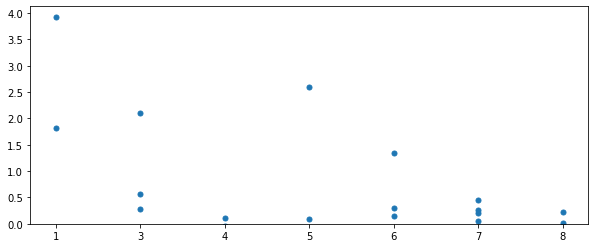

In [741]:
df = tenant_usage_meters.sort_values('Floor')
plt.figure(figsize=(10,4))
plt.plot(df['Floor'], df['avg_consumption'], '.', markersize=10)
plt.ylim(ymin=0)

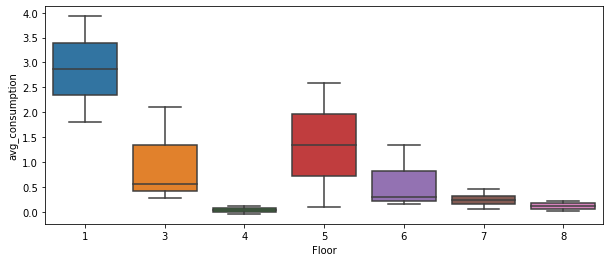

In [742]:
import seaborn as sns
plt.figure(figsize=(10,4))
ax = sns.boxplot(x='Floor', y='avg_consumption', data=tenant_usage_meters)

(0, 4.127099910164888)

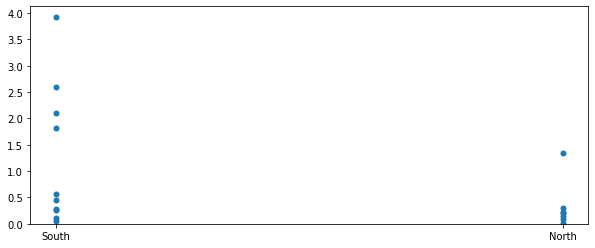

In [744]:
df = tenant_usage_meters.sort_values('Floor')
plt.figure(figsize=(10,4))
plt.plot(df['Direction'], df['avg_consumption'], '.', markersize=10)
plt.ylim(ymin=0)

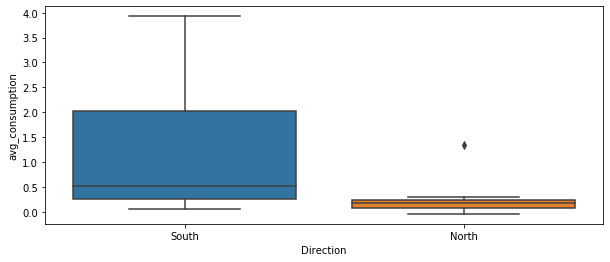

In [743]:
plt.figure(figsize=(10,4))
ax = sns.boxplot(x='Direction', y='avg_consumption', data=tenant_usage_meters)

(0, 4.127099910164888)

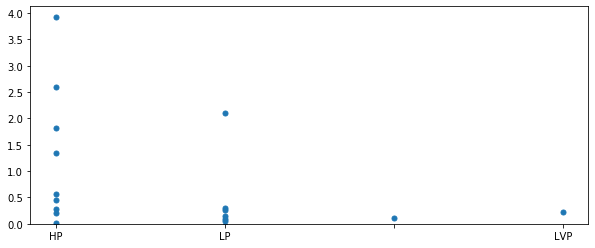

In [746]:
df = tenant_usage_meters.sort_values('Floor')
plt.figure(figsize=(10,4))
plt.plot(df['Other'], df['avg_consumption'], '.', markersize=10)
plt.ylim(ymin=0)

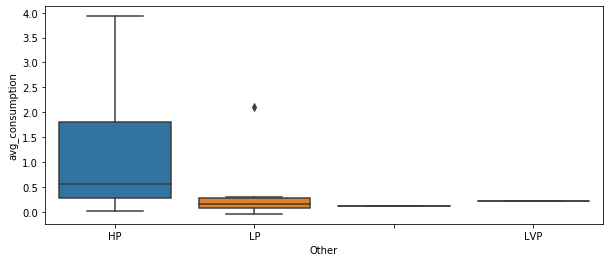

In [747]:
plt.figure(figsize=(10,4))
ax = sns.boxplot(x='Other', y='avg_consumption', data=tenant_usage_meters)

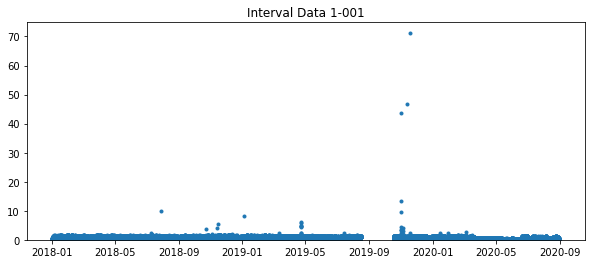

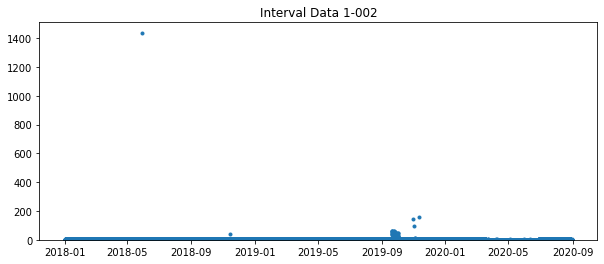

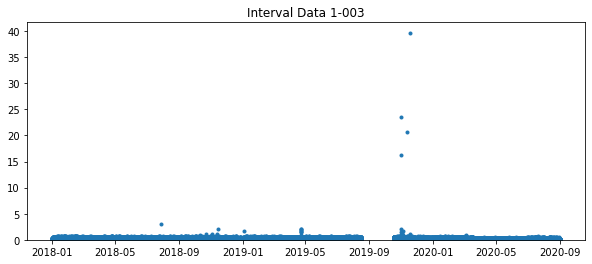

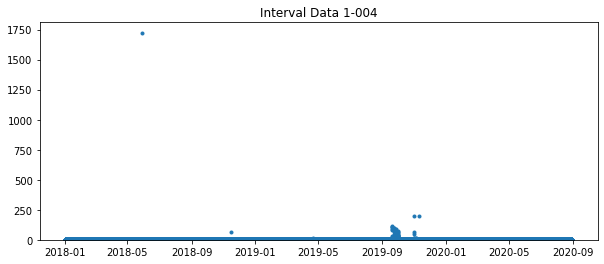

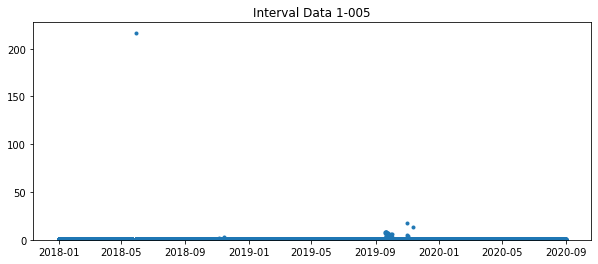

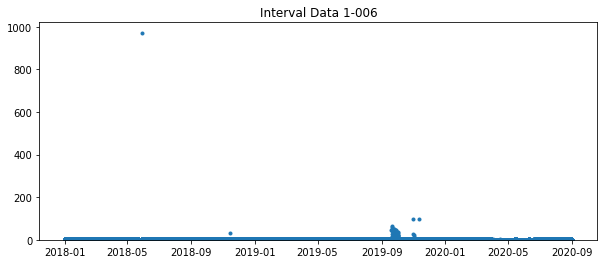

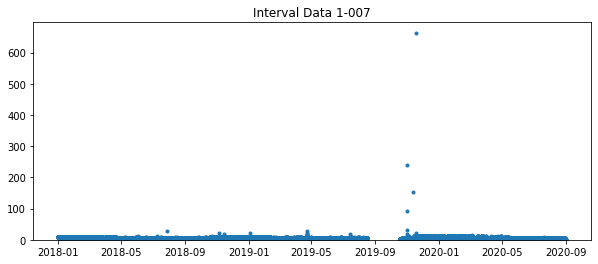

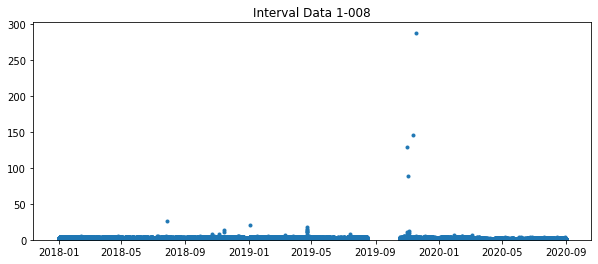

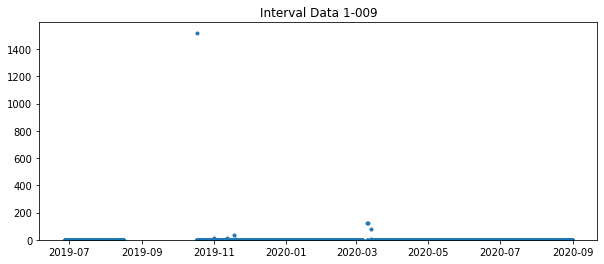

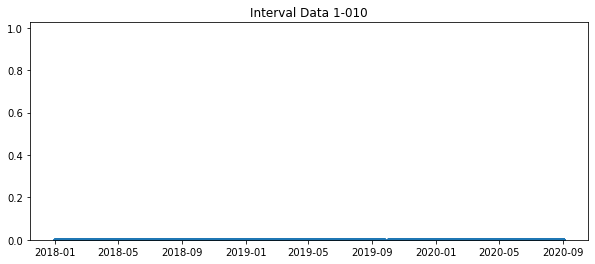

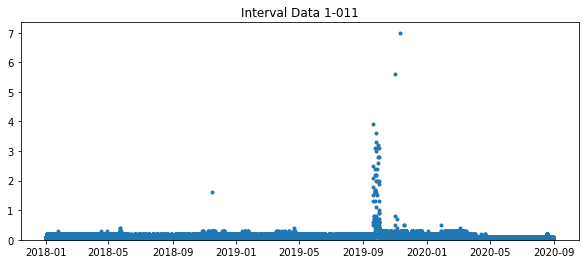

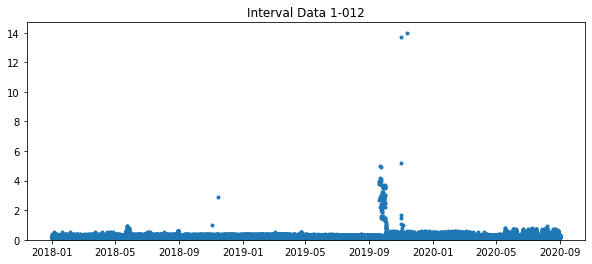

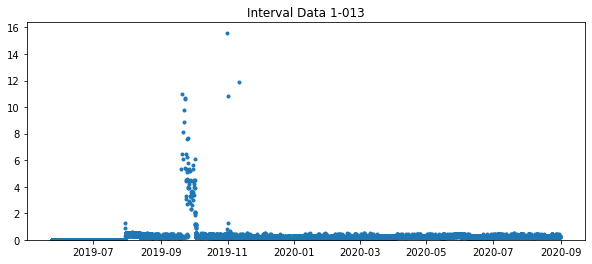

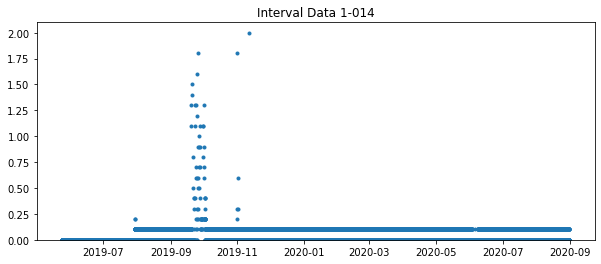

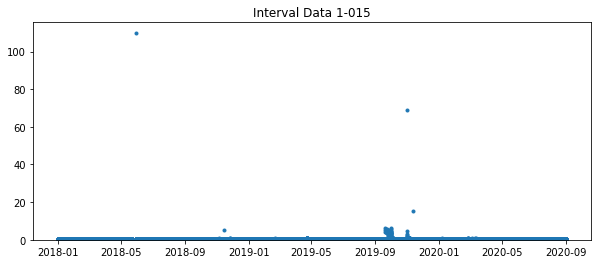

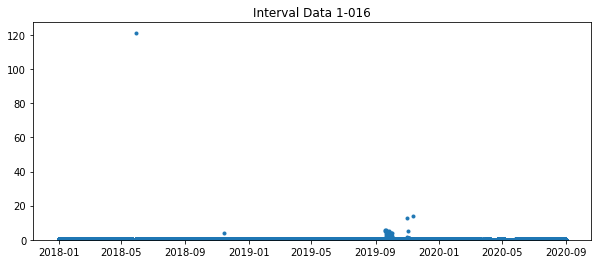

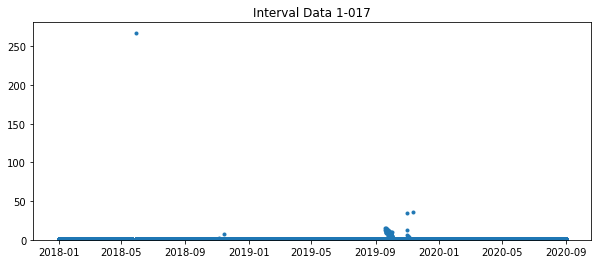

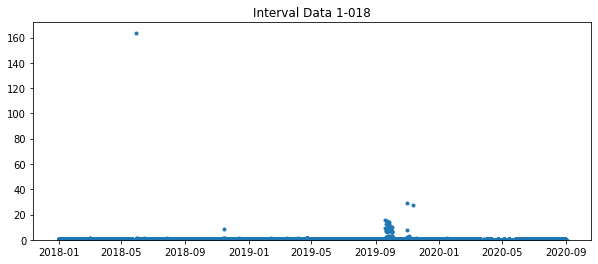

In [363]:
dfs = []
for sheet in tenant_usage.sheet_names[1:]:
    df = tenant_usage.parse(sheet)
    df['date_time'] = pd.to_datetime(df['date_time'])
    df = pd.merge(date_time, df, on='date_time', how='left')
    dfs.append(df)
    plt.figure(figsize=(10,4))
    plt.plot(df['date_time'], df['consumption'], '.')
    plt.ylim(ymin=0)
    plt.title(sheet)
    plt.show()

In [364]:
tenant_usage_010 = dfs[9]
tenant_usage_010

,date_time,meter,consumption,max_demand,min_demand,avg_demand
0,2018-01-01 00:15:00,1-010,0.0,0.0,0.0,0.0
1,2018-01-01 00:30:00,1-010,-0.1,-0.2,-0.2,-0.2
2,2018-01-01 00:45:00,1-010,0.0,-0.2,-0.2,-0.2
3,2018-01-01 01:00:00,1-010,0.0,0.0,0.0,0.0
4,2018-01-01 01:15:00,1-010,-0.1,-0.2,-0.2,-0.2
...,...,...,...,...,...,...
93403,2020-08-30 23:00:00,1-010,-0.1,-0.2,-0.2,-0.2
93404,2020-08-30 23:15:00,1-010,0.0,-0.2,-0.2,-0.2
93405,2020-08-30 23:30:00,1-010,0.0,0.0,0.0,0.0
93406,2020-08-30 23:45:00,1-010,-0.1,-0.2,-0.2,-0.2


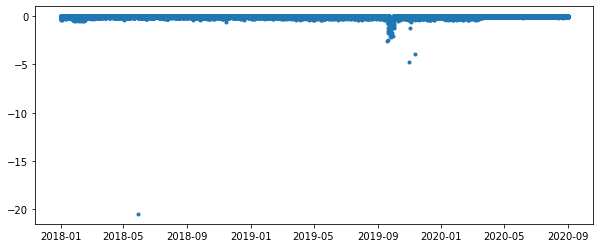

In [382]:
df = tenant_usage_010.copy()
plt.figure(figsize=(10,4))
plt.plot(df['date_time'], df['consumption'], '.')

In [365]:
tenant_usage_014 = dfs[13]
tenant_usage_014

,date_time,meter,consumption,max_demand,min_demand,avg_demand
0,2018-01-01 00:15:00,NaN,NaN,NaN,NaN,NaN
1,2018-01-01 00:30:00,NaN,NaN,NaN,NaN,NaN
2,2018-01-01 00:45:00,NaN,NaN,NaN,NaN,NaN
3,2018-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN
4,2018-01-01 01:15:00,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
93403,2020-08-30 23:00:00,1-014,0.0,0.0,0.0,0.0
93404,2020-08-30 23:15:00,1-014,0.0,0.0,0.0,0.0
93405,2020-08-30 23:30:00,1-014,0.0,0.0,0.0,0.0
93406,2020-08-30 23:45:00,1-014,0.1,0.2,0.2,0.2


(0, 0.10500000000000001)

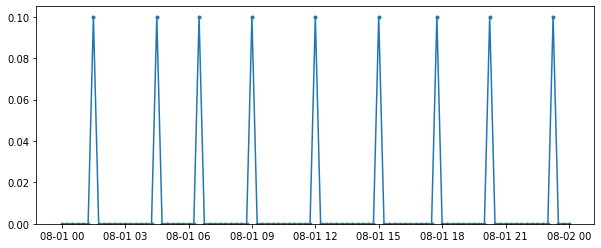

In [375]:
df = tenant_usage_014[(tenant_usage_014['date_time']>='2020-08-01') & (tenant_usage_014['date_time']<='2020-08-02')]
plt.figure(figsize=(10,4))
plt.plot(df['date_time'], df['consumption'], '-o', markersize=3)
plt.ylim(ymin=0)

In [377]:
df[df['consumption']!=0]

,date_time,meter,consumption,max_demand,min_demand,avg_demand
90533,2020-08-01 01:30:00,1-014,0.1,0.2,0.2,0.2
90545,2020-08-01 04:30:00,1-014,0.1,0.2,0.2,0.2
90553,2020-08-01 06:30:00,1-014,0.1,0.2,0.2,0.2
90563,2020-08-01 09:00:00,1-014,0.1,0.2,0.2,0.2
90575,2020-08-01 12:00:00,1-014,0.1,0.2,0.2,0.2
90587,2020-08-01 15:00:00,1-014,0.1,0.2,0.2,0.2
90598,2020-08-01 17:45:00,1-014,0.1,0.2,0.2,0.2
90608,2020-08-01 20:15:00,1-014,0.1,0.2,0.2,0.2
90620,2020-08-01 23:15:00,1-014,0.1,0.2,0.2,0.2
